In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

import cr.utils.plots


In [71]:
df = pd.read_csv('conversion_data.csv')
df.head()


,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [4]:
df.shape


(316200, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [6]:
df.describe()


,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


variables *country* and *source* are in string format therefore it will not be optimal to perform a 
linear regression or a logit regression without creating dummy variables in the dataset


# Linear Regression


## with dummy variables for string values


In [72]:
country_dummies = pd.get_dummies(df['country'])
source_dummies = pd.get_dummies(df['source'])
country_dummies.head()
source_dummies.head()

,Ads,Direct,Seo
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [73]:
df_ext = pd.concat([df, source_dummies, country_dummies], axis=1)
df_ext = df_ext.drop(columns=['country', 'source'])

In [74]:

X = df_ext.drop(columns=['converted'])
y = df_ext.converted
X.head()


,age,new_user,total_pages_visited,Ads,Direct,Seo,China,Germany,UK,US
0,25,1,1,1,0,0,0,0,1,0
1,23,1,5,0,0,1,0,0,0,1
2,28,1,4,0,0,1,0,0,0,1
3,39,1,5,0,0,1,1,0,0,0
4,30,1,6,0,0,1,0,0,0,1


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
lreg = LinearRegression()
lreg.fit(X_train, y_train)
# todo use stratify in random forest

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
linear_score = lreg.score(X_test, y_test)
print(f'score with linear regression with dummy variables" {linear_score}')




score with linear regression with dummy variables" 0.30067233237265023


In [77]:
logit_reg = LogisticRegression()
logit_reg.fit(X_train, y_train)
logit_score = logit_reg.score(X_test, y_test)
print(f'score with linear regression with dummy variables" {logit_score}')
# todo confusion matrix


/Users/michelerexha/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


score with linear regression with dummy variables" 0.9862639679527725


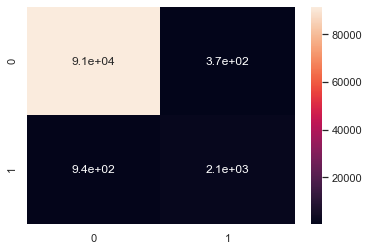

In [78]:
logit_cm = confusion_matrix(y_test, logit_reg.predict(X_test))

sns.set()
sns.heatmap(logit_cm, annot=True)


# Random Forest


## Without stratify


In [81]:
# XX = df.drop(columns=['converted'])
# yy = df.converted
# X_train, X_test, y_train, y_test = train_test_split(XX, yy, random_state=42, test_size=0.3)


In [85]:
tree_reg = DecisionTreeClassifier()
tree_reg.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [43]:
tree_score = tree_reg.score(X_test, y_test)
print(f'score of decision tree classifier with dummy variables" {tree_score}')


score with linear regression with dummy variables" 0.9845140206620282


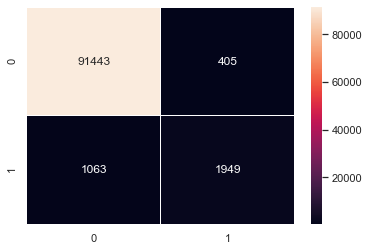

In [89]:
tree_cm = confusion_matrix(y_test, tree_reg.predict(X_test))
sns.set()
sns.heatmap(tree_cm, annot=True, fmt="d", linewidths=.5)

## With stratify


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, stratify=y)
strat_tree_reg = DecisionTreeClassifier()
strat_tree_reg.fit(X_train, y_train)


In [45]:
strat_tree_score = strat_tree_reg.score(X_test, y_test)
print(f'score of decision tree classifier with stratification on y" {strat_tree_score}')


score of decision tree classifier with stratification on y" 0.9874551971326165


In [ ]:
strat_tree_cm = confusion_matrix(y_test, strat_tree_reg.predict(X_test))
sns.set()
sns.heatmap(strat_tree_cm, annot=True, fmt="d", linewidths=.5)
